In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.decomposition import PCA
from matplotlib import rcParams
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import rcParams
from sklearn.feature_selection import SelectKBest

from sklearn import metrics

from google.colab import files
import io

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [0]:
# Set graph parameters
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 10,7

In [68]:
uploaded = files.upload()

Saving cardio_train.csv to cardio_train (1).csv


In [105]:
df = pd.read_csv(io.BytesIO(uploaded['cardio_train.csv']), sep=';')
print(df.shape)
df.head()

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Some information about the features
- Age is currently measured in days
- Gender is classified 1:women and 2:men
- Height is measure in cm
- Weight is measured in kg 
- ap_hi refers to arterial pressure. Specifically the Systolic blood pressures which represents when the heart contracts.
- ap_lo refers to Dystolic Blood Pressure or when the heart contracts. 
    - ap_hi and ap_lo are used to calculate blood pressure (e.g. 120/80)
    - according to the CDC, less than 120/80 is considered normal, between 120/80 and 139/89 is considered at risk for high blood pressure, and more than 140/90 is considered high blood pressure.
- cholesterol and glu are labeled as 1:normal, 2:above normal, 3 well above normal.
- smoke, alco, active, and cardio are binary with cardio as the target

# Data Cleaning

In [106]:
# Change age to years for easier comprehension 
df['age'] = round(df['age'] / 365, 1)

# Add BMI metric for later
df['bmi'] = (df['weight'] / df['height'] / df['height']) * 10000

# Look at shape
print(df.shape)

# Look at general statitics
df.describe()

(70000, 14)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339486,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,28851.302323,6.759534,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,0.000000,29.600000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,48.400000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,74889.250000,58.400000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [107]:
# Look for missing values
df.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
bmi            False
dtype: bool

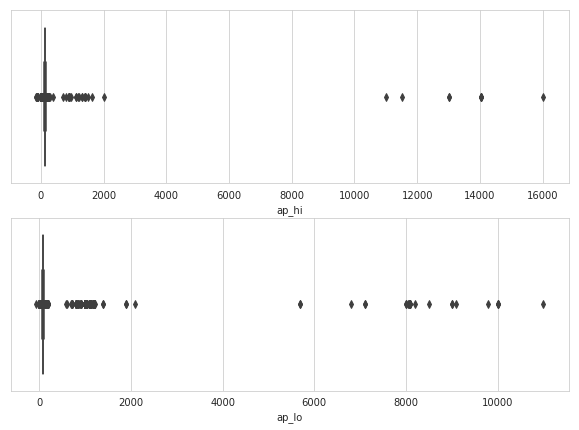

In [108]:
plt.subplot(211)
sns.boxplot(df['ap_hi'])
plt.subplot(212)
sns.boxplot(df['ap_lo'])

In [109]:
print(df[df['ap_hi'] > 370].shape)
print(df[df['ap_lo'] > 360].shape)
print(df[df['ap_hi'] < 0].shape)
print(df[df['ap_lo'] < 0].shape)
print(df[df['ap_hi'] < df['ap_lo']].shape)


(39, 14)
(953, 14)
(7, 14)
(1, 14)
(1234, 14)


In [110]:
df_clean = df.copy()
df_full = df.copy()

df_clean.drop(df_clean[(df_clean['ap_hi']>370)].index,inplace=True)
df_clean.drop(df_clean[(df_clean['ap_hi']>370)].index,inplace=True)
df_clean.drop(df_clean[(df_clean['ap_hi']<0)].index,inplace=True)
df_clean.drop(df_clean[(df_clean['ap_lo']<0)].index,inplace=True)
df_clean.drop(df_clean[(df_clean['ap_hi']<df_clean['ap_lo'])].index,inplace=True)

first_cleaning = 1 - df_copy.shape[0] / df.shape[0]
print(df_copy.shape)
print('Percent of observations lost:', first_cleaning)

(68722, 15)
Percent of observations lost: 0.01825714285714286


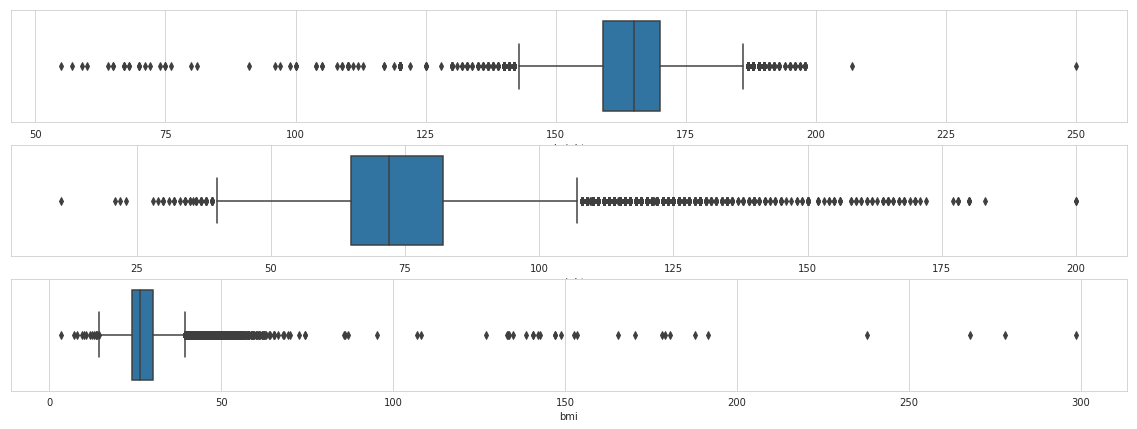

In [111]:
plt.figure(figsize=(20, 7))
plt.subplot(311)
sns.boxplot(df_clean['height'])
plt.subplot(312)
sns.boxplot(df_clean['weight'])
plt.subplot(313)
sns.boxplot(df_clean['bmi']);

In [112]:
print(df_clean[df_clean['height'] < 145].shape)
print(df_clean[df_clean['height'] > 225].shape)
print(df_clean[df_clean['weight'] < 40].shape)
print(df_clean[df_clean['weight'] > 110].shape)
print(df_clean[df_clean['bmi'] > 45].shape)
print(df_clean[df_clean['bmi'] < 15].shape)

(361, 14)
(1, 14)
(49, 14)
(1194, 14)
(579, 14)
(26, 14)


In [113]:
df_clean.drop(df_clean[(df_clean['height'] < 145)].index,inplace=True)
df_clean.drop(df_clean[(df_clean['height'] > 225)].index,inplace=True)
df_clean.drop(df_clean[(df_clean['weight'] < 40)].index,inplace=True)
df_clean.drop(df_clean[(df_clean['weight'] > 110)].index,inplace=True)
df_clean.drop(df_clean[(df_clean['bmi'] > 45)].index,inplace=True)
df_clean.drop(df_clean[(df_clean['bmi'] < 15)].index,inplace=True)

print(df_clean.shape)
print('Percent missing from origianl:', 1 - df_clean.shape[0] / df.shape[0])

print('Total missing from origianl:', (1 - df_clean.shape[0] / df.shape[0]) + first_cleaning)


(67068, 14)
Percent missing from origianl: 0.041885714285714304
Total missing from origianl: 0.060142857142857165


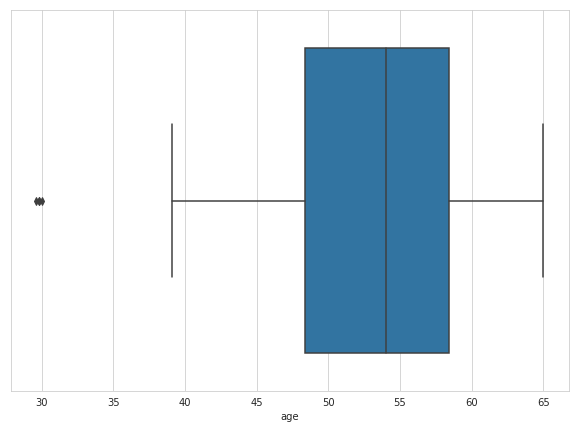

In [114]:
sns.boxplot(df_clean['age'])

In [115]:
df_clean[df_clean['age']<35].shape

(4, 14)

In [0]:
df_clean.drop(df_clean[(df_clean['age']<35)].index,inplace=True)

# Exploratory Data Analysis

Text(0.5, 0, 'Age')

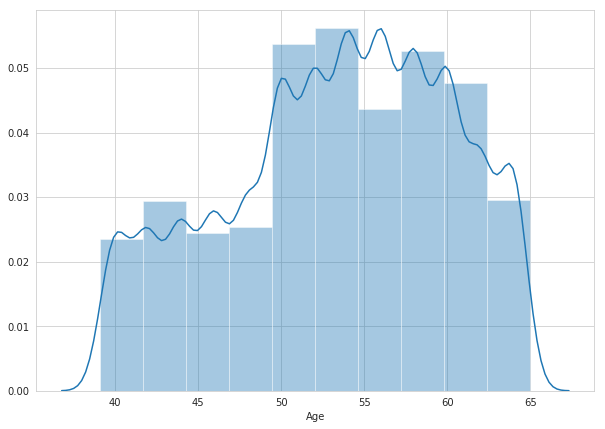

In [117]:
# Look at the distribution of age
sns.distplot(df_clean['age'], bins=10)
plt.xlabel('Age')

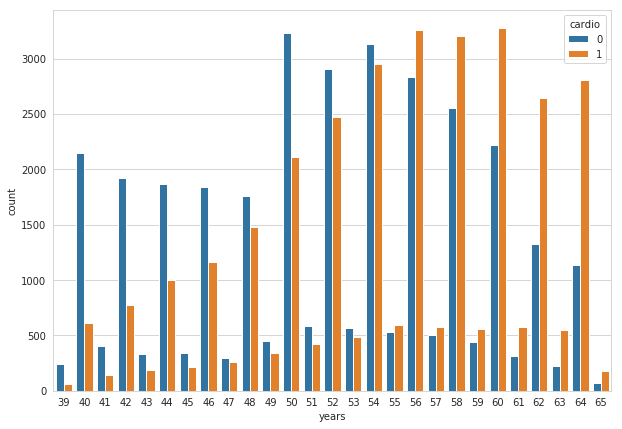

In [118]:
# Look at the distribution of age and the occurance of cardiovascular disease 
df_clean['years'] = (df_clean['age']).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df_clean);

In [120]:
print(df_clean.shape)
print(df_full.shape)

(67064, 15)
(70000, 14)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
age,1.000000,-0.021504,-0.083434,0.067270,0.211650,0.157318,0.156087,0.098820,-0.045891,-0.027614,-0.010687
gender,-0.021504,1.000000,0.520745,0.165538,0.061465,0.065031,-0.037217,-0.021803,0.339135,0.169972,0.007031
height,-0.083434,0.520745,1.000000,0.319329,0.012769,0.030384,-0.060578,-0.023688,0.194315,0.095112,-0.008316
weight,0.067270,0.165538,0.319329,1.000000,0.257003,0.241031,0.135699,0.096420,0.066142,0.065376,-0.015889
ap_hi,0.211650,0.061465,0.012769,0.257003,1.000000,0.718435,0.192460,0.088705,0.026674,0.032782,0.000132
ap_lo,0.157318,0.065031,0.030384,0.241031,0.718435,1.000000,0.155512,0.070190,0.024424,0.034214,-0.000060
cholesterol,0.156087,-0.037217,-0.060578,0.135699,0.192460,0.155512,1.000000,0.449229,0.008132,0.033641,0.009042
gluc,0.098820,-0.021803,-0.023688,0.096420,0.088705,0.070190,0.449229,1.000000,-0.008784,0.007351,-0.007510
smoke,-0.045891,0.339135,0.194315,0.066142,0.026674,0.024424,0.008132,-0.008784,1.000000,0.341144,0.027430
alco,-0.027614,0.169972,0.095112,0.065376,0.032782,0.034214,0.033641,0.007351,0.341144,1.000000,0.026579


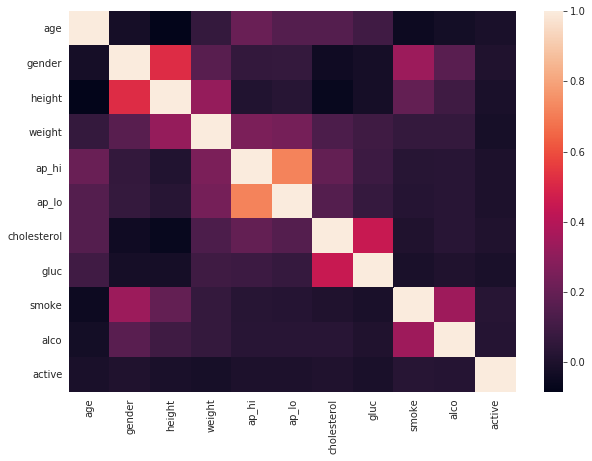

In [121]:
# Create features and target variables
X_clean = df_clean.drop(['id', 'cardio', 'years', 'bmi'], 1)
y_clean = df_clean.cardio

X_full = df_full.drop(['id', 'cardio', 'bmi'], 1)
y_full = df_full['cardio']

# Look at a correlation matrix and heatmap of correlation between feature variables
corrmat_clean = X_clean.corr()
sns.heatmap(corrmat_clean);
corrmat_clean

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
age,1.000000,-0.022794,-0.081522,0.053654,0.020778,0.017630,0.154394,0.098672,-0.047638,-0.029730,-0.009931
gender,-0.022794,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866
height,-0.081522,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570
weight,0.053654,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867
ap_hi,0.020778,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033
ap_lo,0.017630,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780
cholesterol,0.154394,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911
gluc,0.098672,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770
smoke,-0.047638,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858
alco,-0.029730,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476


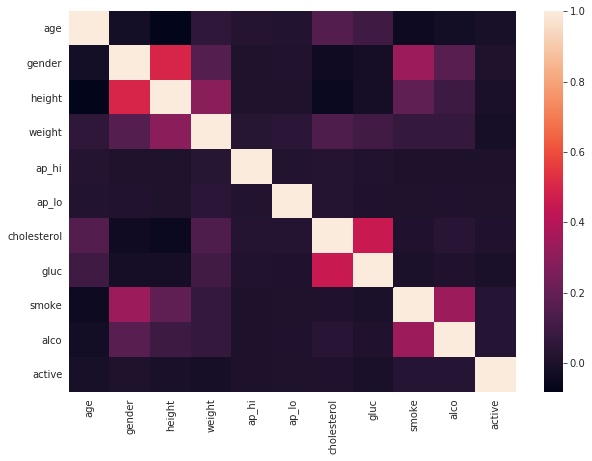

In [122]:
corrmat_full = X_full.corr()
sns.heatmap(corrmat_full);
corrmat_full

# Modeling


### Feature Selection

In [123]:
X_new = SelectKBest(k=5).fit_transform(X_clean, y_clean)
Kbest_X_clean = pd.DataFrame(X_new)
Kbest_X_clean.head()

,0,1,2,3,4
0,50.4,62.0,110.0,80.0,1.0
1,55.4,85.0,140.0,90.0,3.0
2,51.7,64.0,130.0,70.0,3.0
3,48.3,82.0,150.0,100.0,1.0
4,47.9,56.0,100.0,60.0,1.0


In [124]:
X_new = SelectKBest(k=5).fit_transform(X_full, y_full)
Kbest_X_full = pd.DataFrame(X_new)
Kbest_X_full.head()

,0,1,2,3,4
0,50.4,62.0,80.0,1.0,1.0
1,55.4,85.0,90.0,3.0,1.0
2,51.7,64.0,70.0,3.0,1.0
3,48.3,82.0,100.0,1.0,1.0
4,47.9,56.0,60.0,1.0,1.0


In [125]:
pca = PCA(n_components=5)
x_pca_clean = pca.fit_transform(X_clean)
pca.explained_variance_ratio_

array([0.55631654, 0.23738343, 0.0814281 , 0.06496473, 0.05802953])

In [126]:
pca = PCA(n_components=5)
x_pca_full = pca.fit_transform(X_full)
pca.explained_variance_ratio_

array([0.59669156, 0.39791891, 0.00360579, 0.00103112, 0.0007322 ])

In [0]:
def model_analysis(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
  model.fit(X_train, y_train)
  
  y_pred = model.predict(X_test)
  print(metrics.confusion_matrix(y_test, y_pred))
  
  r_squared = model.score(X_test, y_test)
  accuracy = metrics.f1_score(y_test, y_pred)
  
  print('r-squared:', r_squared)
  print('f1:', accuracy)
  
  return [r_squared, accuracy]

### Logistic Regression

first model without removing any observations 

In [90]:
logreg = LogisticRegression()

print('Cleaned data')
print('All features')
clean_log_all = model_analysis(logreg, X_clean, y_clean)
print()
print('PCA')
clean_log_pca = model_analysis(logreg, x_pca_clean, y_clean)
print()
print('K_best')
clean_log_kbest = model_analysis(logreg, Kbest_X_clean, y_clean)

Cleaned data
All features
[[8031 2181]
 [3276 6632]]
r-squared: 0.7287773359840954
f1: 0.7085091608354255

PCA
[[7955 2291]
 [3383 6491]]
r-squared: 0.7179920477137177
f1: 0.6958619210977701

K_best
[[8073 2077]
 [3414 6556]]
r-squared: 0.7270874751491053
f1: 0.7048325538891577


In [91]:
logreg = LogisticRegression()

print('Full data')
print('All features')
full_log_all = logreg_scores = model_analysis(logreg, X_full, y_full)
print()
print('PCA')
full_log_pca = model_analysis(logreg, x_pca_full, y_full)
print()
print('K_best')
full_log_kbest = model_analysis(logreg, Kbest_X_full, y_full)

Full data
All features
[[7941 2520]
 [3349 7190]]
r-squared: 0.7205238095238096
f1: 0.7101585263469801

PCA
[[7696 2836]
 [3292 7176]]
r-squared: 0.7081904761904761
f1: 0.7007812499999999

K_best
[[7116 3387]
 [4087 6410]]
r-squared: 0.644095238095238
f1: 0.6317138070365625


### Random Forest

In [92]:
# random forest
rfc = ensemble.RandomForestClassifier()

print('Cleaned Data')
print('All features')
clean_rfc_all = model_analysis(rfc, X_clean, y_clean)
print()
print('PCA')
clean_rfc_pca = model_analysis(rfc, x_pca_clean, y_clean)
print()
print('K_best')
clean_rfc_kbest = model_analysis(rfc, Kbest_X_clean, y_clean)

Cleaned Data
All features
[[7738 2611]
 [3534 6237]]
r-squared: 0.6945825049701789
f1: 0.6699607927386003

PCA
[[7437 2776]
 [3752 6155]]
r-squared: 0.6755467196819086
f1: 0.653466397706763

K_best
[[7243 2961]
 [3630 6286]]
r-squared: 0.6724155069582505
f1: 0.6560559411365654


In [93]:
# random forest
rfc = ensemble.RandomForestClassifier()

print('Full data')
print('All features')
full_rfc_all = rfc_scores = model_analysis(rfc, X_full, y_full)
print()
print('PCA')
full_rfc_pca = model_analysis(rfc, x_pca_full, y_full)
print()
print('K_best')
full_rfc_kbest = model_analysis(rfc, Kbest_X_full, y_full)

Full data
All features
[[7722 2792]
 [3590 6896]]
r-squared: 0.6960952380952381
f1: 0.6836522256369585

PCA
[[7581 2954]
 [3860 6605]]
r-squared: 0.6755238095238095
f1: 0.659708349980024

K_best
[[6930 3517]
 [4033 6520]]
r-squared: 0.6404761904761904
f1: 0.6333171442447791


### K Nearest Neighbors

In [94]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Normalize data for Euclidean geometry

print('Cleaned data')
print('All features')
clean_knn_all = model_analysis(knn, normalize(X_clean), y_clean)
print()
print('PCA')
clean_knn_pca = model_analysis(knn, normalize(x_pca_clean), y_clean)
print()
print('K_best')
clean_knn_kbest = model_analysis(knn, normalize(Kbest_X_clean), y_clean)

Cleaned data
All features
[[7184 3002]
 [3431 6503]]
r-squared: 0.6802683896620279
f1: 0.6690673388548793

PCA
[[6896 3353]
 [3342 6529]]
r-squared: 0.6672465208747514
f1: 0.6610641421556219

K_best
[[6874 3324]
 [3821 6101]]
r-squared: 0.6448807157057654
f1: 0.630692096965938


In [95]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Normalize data for Euclidean geometry

print('Full Data')
print('All features')
full_knn_all = model_analysis(knn, normalize(X_full), y_full)
print()
print('PCA')
full_knn_pca = model_analysis(knn, normalize(x_pca_full), y_full)
print()
print('K_best')
full_knn_kbest = model_analysis(knn, normalize(Kbest_X_full), y_full)

Full Data
All features
[[7278 3228]
 [3513 6981]]
r-squared: 0.679
f1: 0.6743950152151862

PCA
[[7112 3390]
 [3490 7008]]
r-squared: 0.6723809523809524
f1: 0.6707503828483921

K_best
[[6803 3685]
 [4459 6053]]
r-squared: 0.6121904761904762
f1: 0.5978271604938272


### Gradient Boosting Classifier

In [96]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
gbc = ensemble.GradientBoostingClassifier(**params)

print('Cleaned data')
print('All features')
clean_gbc_all = model_analysis(gbc, X_clean, y_clean)
print()
print('PCA')
clean_gbc_pca = model_analysis(gbc, x_pca_clean, y_clean)
print()
print('K_best')
clean_gbc_kbest = model_analysis(gbc, Kbest_X_clean, y_clean)

Cleaned data
All features
[[8019 2220]
 [3095 6786]]
r-squared: 0.7358349900596421
f1: 0.7185895060094244

PCA
[[7998 2323]
 [3257 6542]]
r-squared: 0.7226640159045725
f1: 0.7010287183883411

K_best
[[7941 2370]
 [2984 6825]]
r-squared: 0.73389662027833
f1: 0.7182698379288571


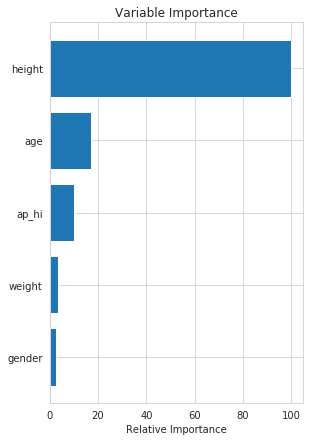

In [97]:
feature_importance = gbc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [99]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
gbc = ensemble.GradientBoostingClassifier(**params)

print('Full Data')
print('All features')
full_gbc_all = model_analysis(gbc, X_full, y_full)
print()
print('PCA')
full_gbc_pca = model_analysis(gbc, x_pca_full, y_full)
print()
print('K_best')
full_gbc_kbest = model_analysis(gbc, Kbest_X_full, y_full)

Full Data
All features
[[8193 2396]
 [3082 7329]]
r-squared: 0.7391428571428571
f1: 0.7279499404052444

PCA
[[7990 2379]
 [3368 7263]]
r-squared: 0.7263333333333334
f1: 0.7165195087061609

K_best
[[7832 2680]
 [3585 6903]]
r-squared: 0.7016666666666667
f1: 0.6878581037317523


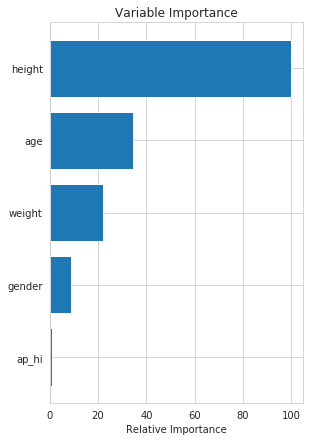

In [100]:
feature_importance = gbc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [104]:
results_clean = pd.DataFrame(index=['r-squared', 'f1'])

results_clean['clean log all'] = clean_log_all
results_clean['clean log pca'] = clean_log_pca
results_clean['clean log kbest'] = clean_log_kbest
results_clean['clean rfc all'] = clean_rfc_all
results_clean['clean rfc pca'] = clean_rfc_pca
results_clean['clean rfc kbest'] = clean_rfc_kbest
results_clean['clean knn all'] = clean_knn_all
results_clean['clean knn pca'] = clean_knn_pca
results_clean['clean knn kbest'] = clean_knn_kbest
results_clean['clean gbc all'] = clean_gbc_all
results_clean['clean gbc pca'] = clean_gbc_pca
results_clean['clean gbc kbest'] = clean_gbc_kbest

results_clean.head()


,clean log all,clean log pca,clean log kbest,clean rfc all,clean rfc pca,clean rfc kbest,clean knn all,clean knn pca,clean knn kbest,clean gbc all,clean gbc pca,clean gbc kbest
r-squared,0.728777,0.717992,0.727087,0.694583,0.675547,0.672416,0.680268,0.667247,0.644881,0.735835,0.722664,0.733897
f1,0.708509,0.695862,0.704833,0.669961,0.653466,0.656056,0.669067,0.661064,0.630692,0.718590,0.701029,0.718270


In [103]:
results_full = pd.DataFrame(index=['r-squared', 'f1'])

results_full['Full log all'] = full_log_all
results_full['Full log pca'] = full_log_pca
results_full['Full log kbest'] = full_log_kbest
results_full['Full rfc all'] = full_rfc_all
results_full['Full rfc pca'] = full_rfc_pca
results_full['Full rfc kbest'] = full_rfc_kbest
results_full['Full knn all'] = full_knn_all
results_full['Full knn pca'] = full_knn_pca
results_full['Full knn kbest'] = full_knn_kbest
results_full['Full gbc all'] = full_gbc_all
results_full['Full gbc pca'] = full_gbc_pca
results_full['Full gbc kbest'] = full_gbc_kbest

results_full.head()


,Full log all,Full log pca,Full log kbest,Full rfc all,Full rfc pca,Full rfc kbest,Full knn all,Full knn pca,Full knn kbest,Full gbc all,Full gbc pca,Full gbc kbest
r-squared,0.720524,0.708190,0.644095,0.696095,0.675524,0.640476,0.679000,0.672381,0.612190,0.739143,0.726333,0.701667
f1,0.710159,0.700781,0.631714,0.683652,0.659708,0.633317,0.674395,0.670750,0.597827,0.727950,0.716520,0.687858
